In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.6.13


In [2]:
# Instala o pacote Seaborn
!pip install -q seaborn

In [3]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
print(f"Numpy:\t\t{np.__version__}")
print(f"Pandas:\t\t{pd.__version__}")
print(f"Seaborn:\t{sns.__version__}")
print(f"Matplotlib:\t{mat.__version__}")

Numpy:		1.19.5
Pandas:		1.1.5
Seaborn:	0.11.2
Matplotlib:	3.3.4


In [5]:
# Dataset
data_path = "autos.csv"
df = pd.read_csv(data_path,encoding = "latin-1")

In [6]:
# Dataframe
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9


In [7]:
# Colunas do Dataframe
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

# PARTE 1

## Distribuição de Veículos com base no Ano de Registro

In [8]:
df.groupby(['yearOfRegistration']).count()['model']

yearOfRegistration
1910     100
1915       1
1919       1
1920       1
1923       2
        ... 
2012    3714
2013    1763
2014     986
2015     641
2016    8093
Name: model, Length: 93, dtype: int64

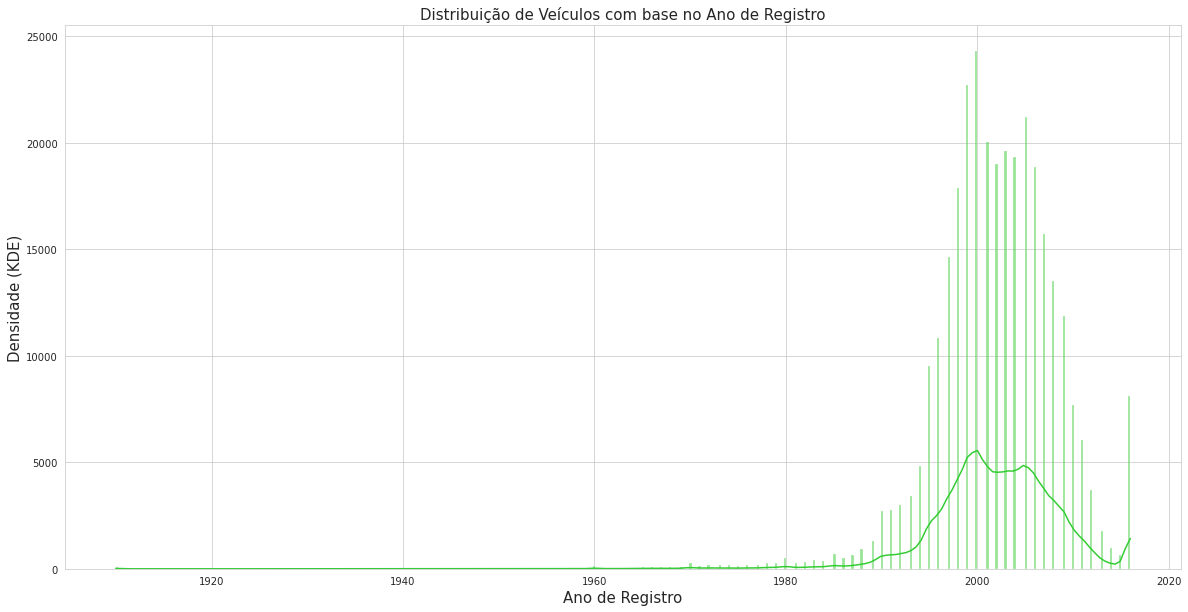

In [9]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(df["yearOfRegistration"], color="#33cc33", kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

## Variação da faixa de preço pelo tipo de veículo

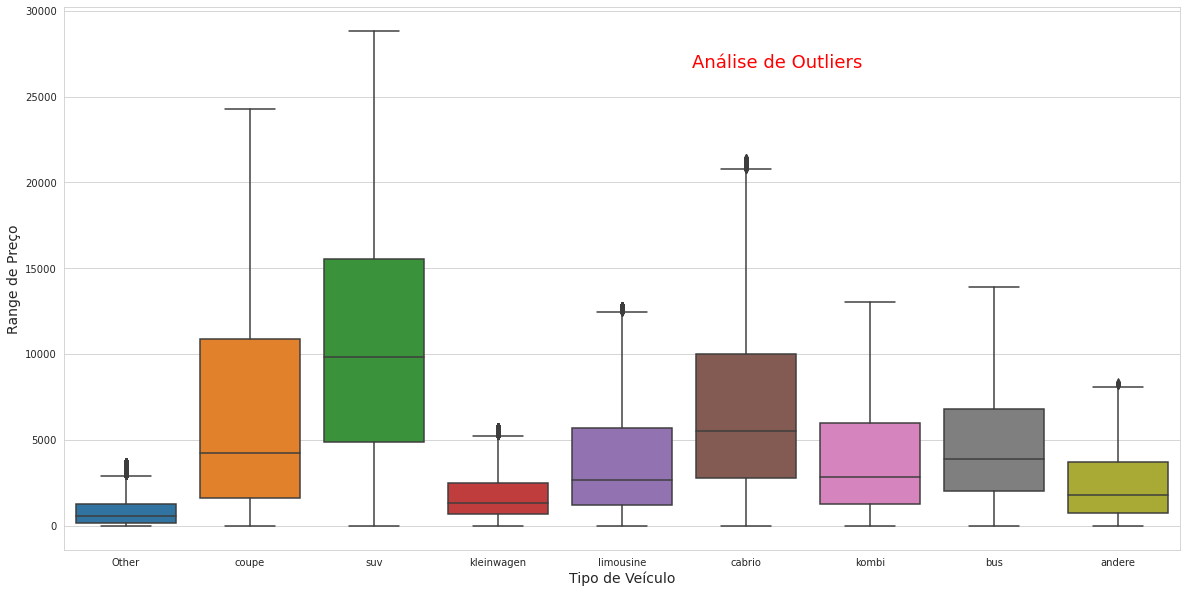

In [10]:
# Crie um Boxplot para avaliar os outliers
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25, 27000, "Análise de Outliers", fontsize=18, color="r", ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo", fontdict={'size':14})
ax.yaxis.set_label_text("Range de Preço", fontdict={'size':14})
plt.show()

## Contagem total de veículos à venda conforme o tipo de veículo

In [11]:
df.groupby(['vehicleType']).count()['model']

vehicleType
Other         19447
andere         2908
bus           26833
cabrio        20388
coupe         16920
kleinwagen    69334
kombi         60195
limousine     84077
suv           13585
Name: model, dtype: int64

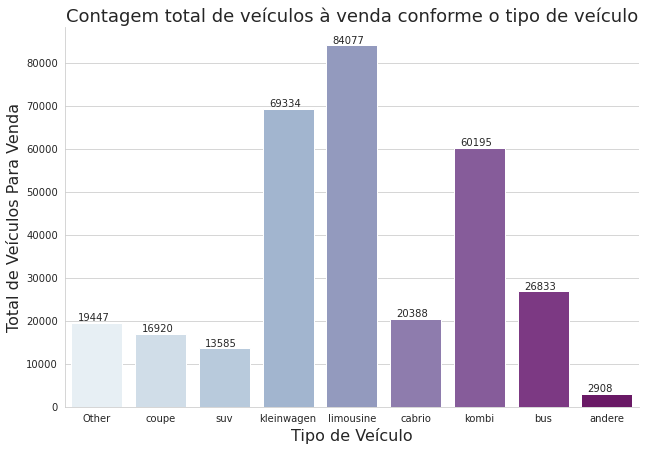

In [12]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria
g = sns.catplot(x="vehicleType", data=df, kind="count", palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

# PARTE 2

## Número de veículos pertencentes a cada marca

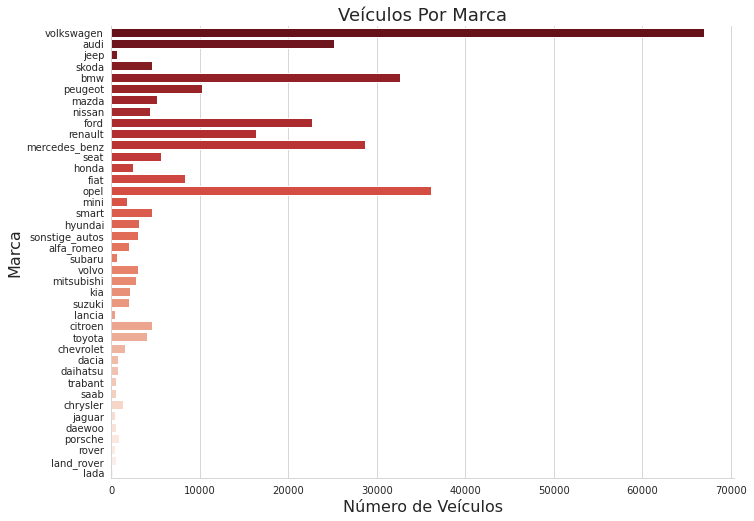

In [13]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
g = sns.catplot(y="brand", data=df, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Veículos Por Marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict={'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict={'size':16})
plt.show()

## Preço médio dos veículos com base no tipo de veículo e no tipo de caixa de câmbio

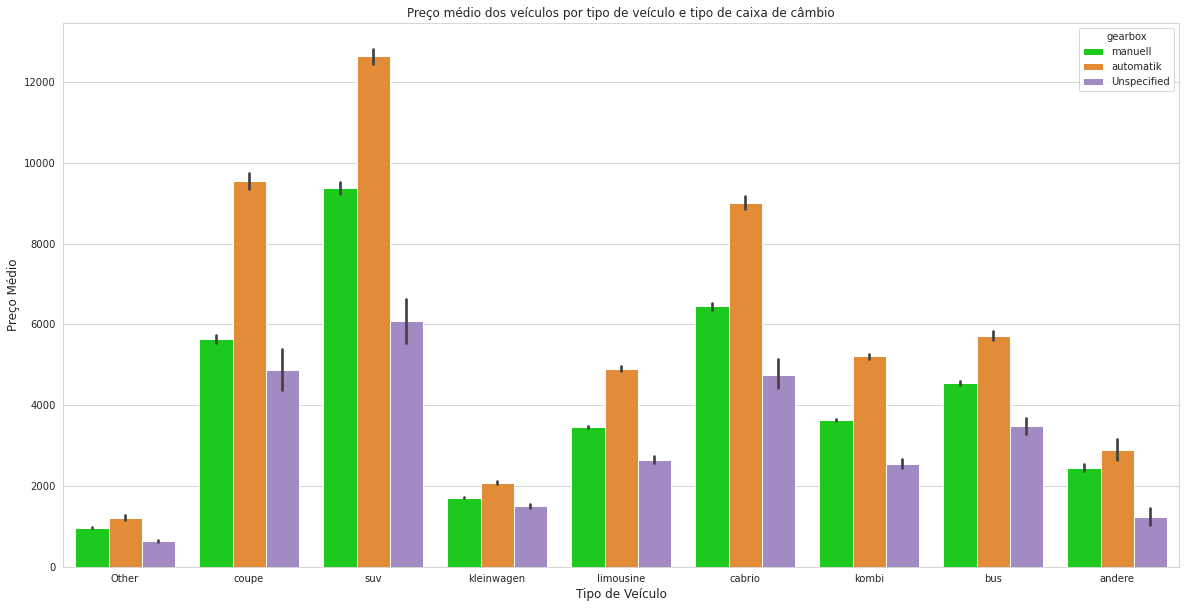

In [14]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(20,10))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

# PARTE 3

## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

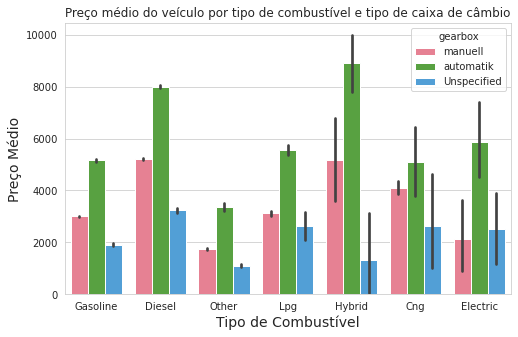

In [15]:
# Crie um Barplot com o Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

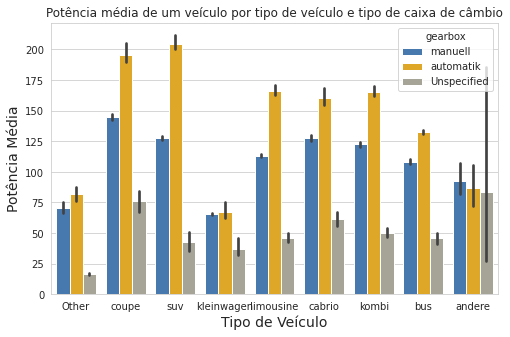

In [18]:
# Crie um Barplot com a Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(20,10))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio", fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo", fontdict= {'size':14})
ax.yaxis.set_label_text("Potência Média", fontdict= {'size':14})
plt.show()

# PARTE 4

In [19]:
# Calcule a média de preço por marca e por veículo
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

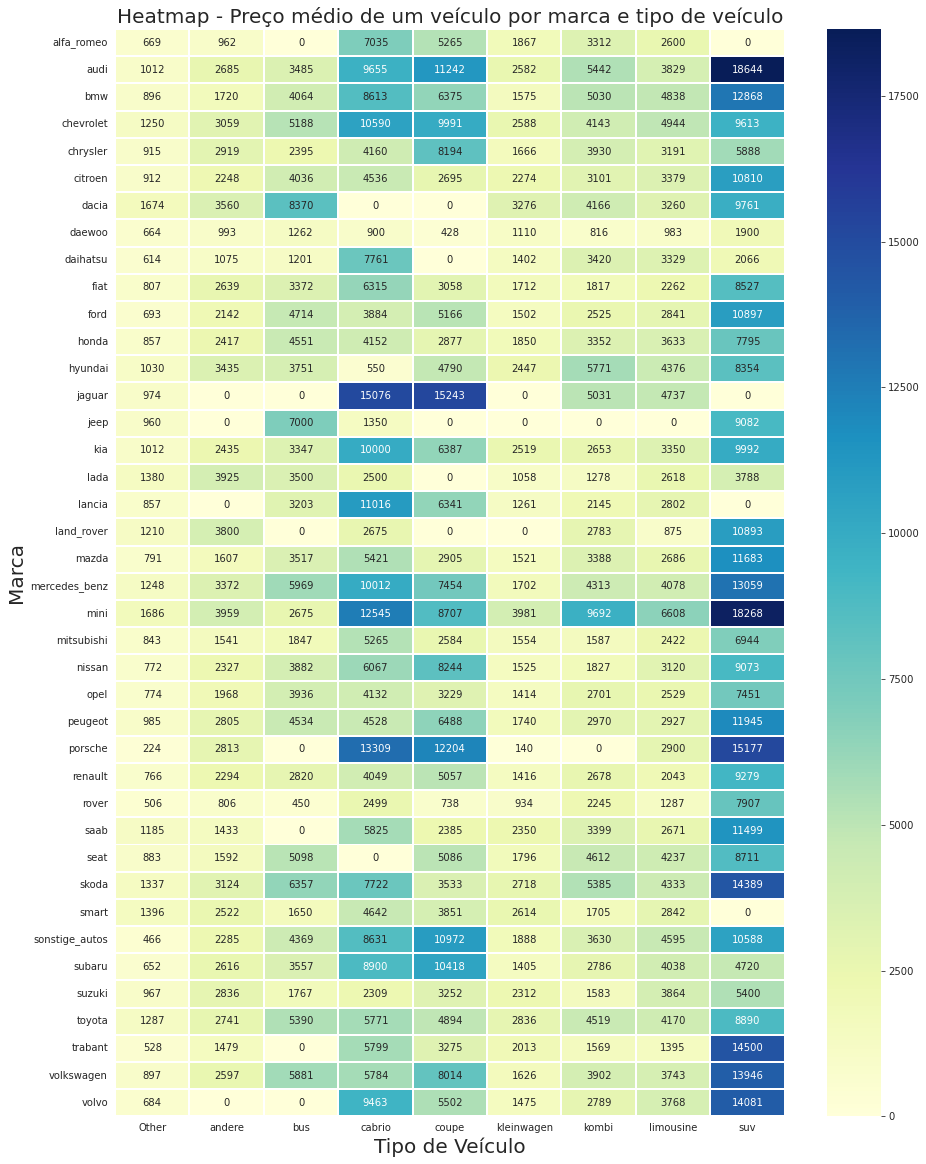

In [20]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo", fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo", fontdict= {'size':20})
ax.yaxis.set_label_text("Marca", fontdict= {'size':20})
plt.show()